In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
!pip3 install seaborn

    100% |████████████████████████████████| 215kB 15.2MB/s ta 0:00:01
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
%load_ext autoreload
%autoreload 2
from utils import *

import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import os
import lightgbm as lgbm
import warnings
from utils import *
from scipy.signal import savgol_filter
import seaborn as sns
sns.set()

warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
#ticker='LKOH'
#ticker='SIBN'
ticker='MTLR'
#ticker='VTBR'
#ticker='ENRU'

start_date=datetime.strptime("20170101", "%Y%m%d").date()
end_date=datetime.today().date() + timedelta(days=1)

load_single(ticker, data_prefix="data/current", start_date=start_date, end_date=end_date, period=3)
df = pd.read_csv('data/current/{}.csv'.format(ticker))
df['date'] = df['<DATE>'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").date())

In [16]:
month_series = df_between(df, end_date - timedelta(days=30), end_date)['<OPEN>'].values
#week_series = df_between(df_arr[0], corn_date - timedelta(days=7), corn_date)['<OPEN>'].values
#day3_series = df_between(df_arr[0], corn_date - timedelta(days=3), corn_date)['<OPEN>'].values
#sm1 = savgol_filter(month_series, 101, 3)
# sm2 = savgol_filter(month_series, 101, 3)
support_levels = calc_support_levels(month_series)

In [5]:
month_series[-1]

62.0

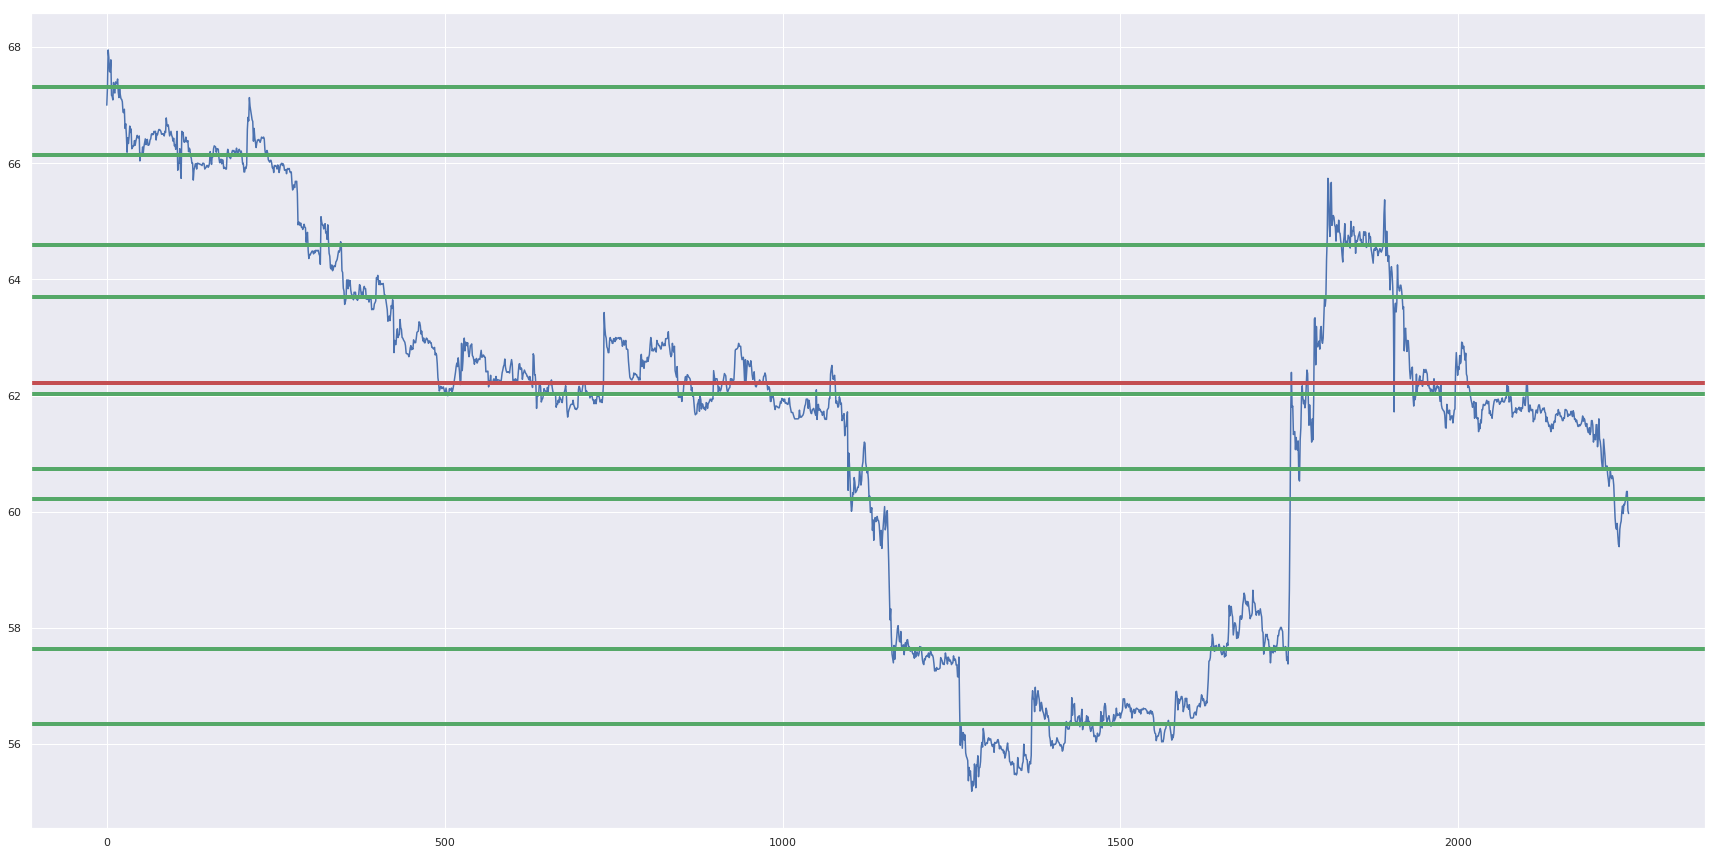

In [17]:
plt.figure(figsize=(30, 15))
plt.plot(month_series)
#plt.plot(sm1)
#plt.plot(sm2)

#plt.axhline(y=5333, linewidth=4, color='r')
#plt.axhline(y=351.4, linewidth=4, color='r')
#plt.axhline(y=84.83, linewidth=4, color='r')
plt.axhline(y=62.21, linewidth=4, color='r')

for level in support_levels:
    plt.axhline(y=level, linewidth=4, color='g')


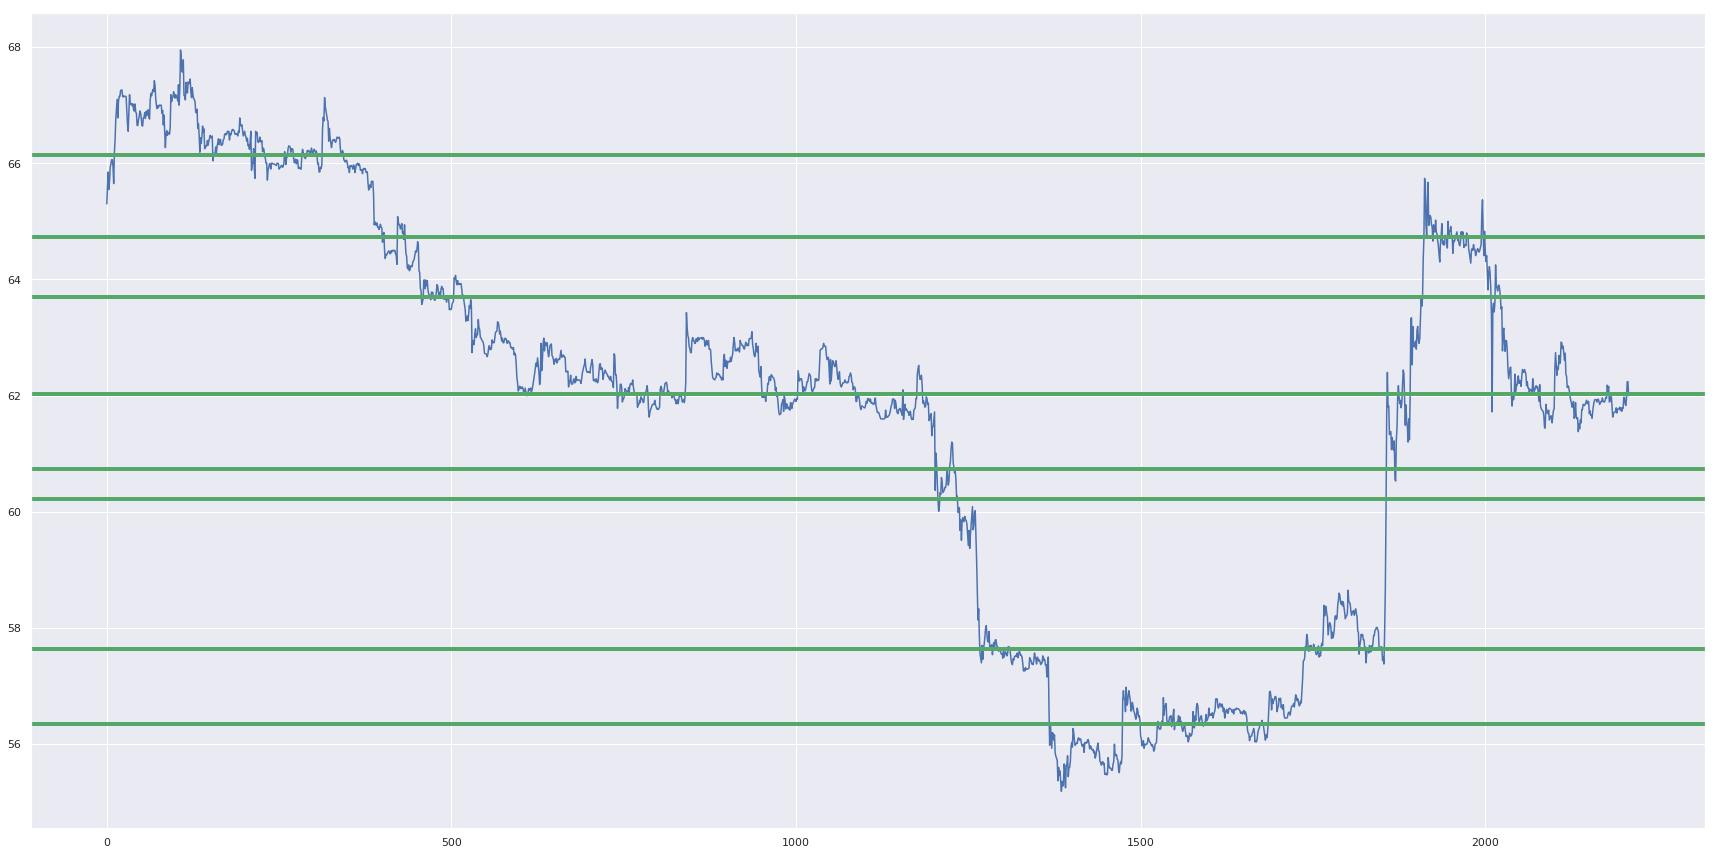

In [6]:
plt.figure(figsize=(30, 15))
plt.plot(month_series)
#plt.plot(sm1)
#plt.plot(sm2)

#plt.axhline(y=5333, linewidth=4, color='r')
#plt.axhline(y=351.4, linewidth=4, color='r')
#plt.axhline(y=84.83, linewidth=4, color='r')
#plt.axhline(y=0.039745, linewidth=4, color='r')

for level in support_levels:
    plt.axhline(y=level, linewidth=4, color='g')


In [34]:
month_series[-1]

5218.0

In [35]:
(5333 - month_series[-1]) / 5333

0.02156384774048378

In [23]:
(87 - 84) / 87

0.034482758620689655

In [12]:
class A:
    def __init__(self):
        self.x = 1
        

In [13]:
a = A()

In [14]:
a.run()

AttributeError: 'A' object has no attribute 'run'

In [17]:
import ibapi